In [163]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib


In [164]:
df = pd.read_csv("../data/cleaned_data123.csv")
#Exam_Score

In [165]:
#splitting train vs test

y=df['Exam_Score']
x=df.drop(['Exam_Score'], axis=1)


#droppinf the cols which end with _label bec they are unnecessary now
x = x[[col for col in x.columns if not col.endswith('_label')]]

In [166]:

x_train,x_test,y_train,y_test= train_test_split (x,y, test_size=0.3, random_state=42)

In [167]:
scaler = StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

In [168]:
x_train_scaled = np.nan_to_num(x_train_scaled)
#
x_test_scaled = np.nan_to_num(x_test_scaled)

In [169]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

# Convert y_train_balanced to a labeled Series
y_train_balanced = pd.Series(y_train_balanced, name='Exam_Score')

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_balanced.value_counts())

Before SMOTE:
 Exam_Score
D    3111
C     961
F      37
B      19
A      12
Name: count, dtype: int64

After SMOTE:
 Exam_Score
D    3111
C    3111
F    3111
B    3111
A    3111
Name: count, dtype: int64


In [170]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(x_train_balanced, y_train_balanced )
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



/home/rola/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6732
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.01      0.33      0.01         6
           C       0.87      0.73      0.79       395
           D       0.98      0.66      0.79      1346
           F       0.64      1.00      0.78        21

    accuracy                           0.67      1775
   macro avg       0.50      0.54      0.47      1775
weighted avg       0.94      0.67      0.78      1775

Decision Tree Accuracy: 0.8135
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.00      0.00      0.00         6
           C       0.67      0.70      0.68       395
           D       0.90      0.86      0.88      1346
           F       0.35      0.43      0.38        21

    accuracy                           0.81      1775
   macro avg       0.38      0.40      0.39      1775
weighted 

/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


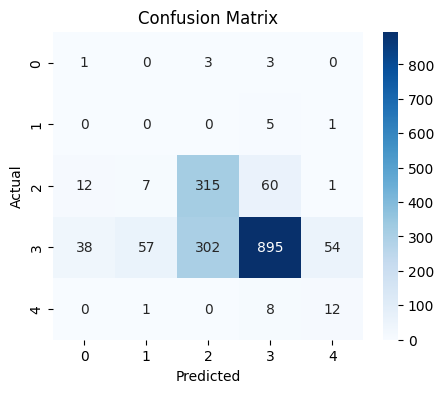

In [171]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

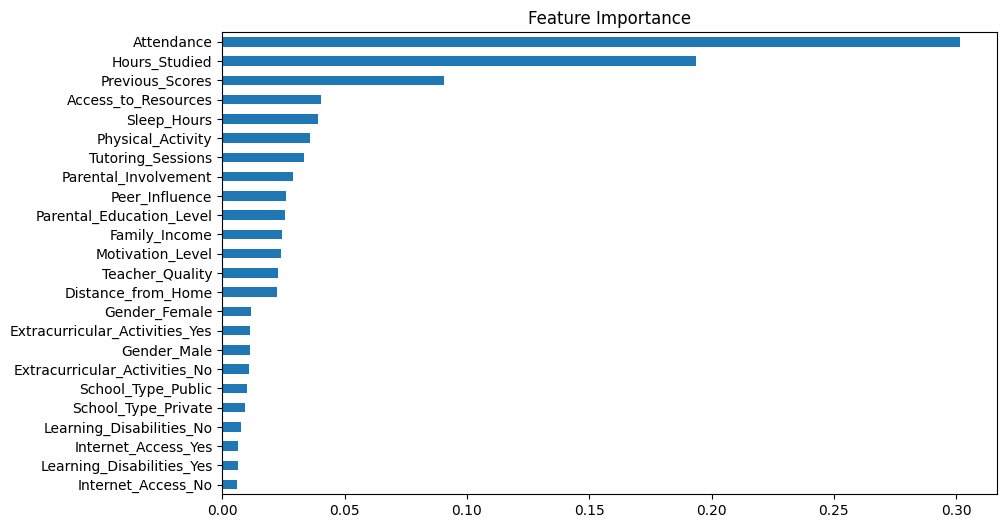

In [172]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
features = pd.Series(importances, index=x_train.columns)
features.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

In [173]:
for name, model in models.items():
    model.fit(x_train_balanced, y_train_balanced)
    
    # Training performance
    y_train_pred = model.predict(x_train_balanced)
    train_acc = accuracy_score(y_train_balanced, y_train_pred)

    # Test performance
    y_test_pred = model.predict(x_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"{name}")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    print()

/home/rola/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
  Train Accuracy: 0.8243
  Test Accuracy:  0.6732

Decision Tree
  Train Accuracy: 1.0000
  Test Accuracy:  0.8068

SVM
  Train Accuracy: 0.9975
  Test Accuracy:  0.9448

Random Forest
  Train Accuracy: 1.0000
  Test Accuracy:  0.9070

KNN
  Train Accuracy: 0.9499
  Test Accuracy:  0.6890



In [174]:
# save a model to a file

joblib.dump(model, "../savedmodels/rf_model.pk1")


['../savedmodels/rf_model.pk1']

In [175]:
loaded_model = joblib.load("../savedmodels/rf_model.pk1")